# **Project: Providing data-driven suggestions for HR**

## Description and deliverables

This project analyzes a dataset and builds a predictive model that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, we present  two artifacts. One is a brief one-page summary of this project to present to external stakeholders as the data professional in Salifort Motors. The other is a technical material as provided here.

# **PACE stages**


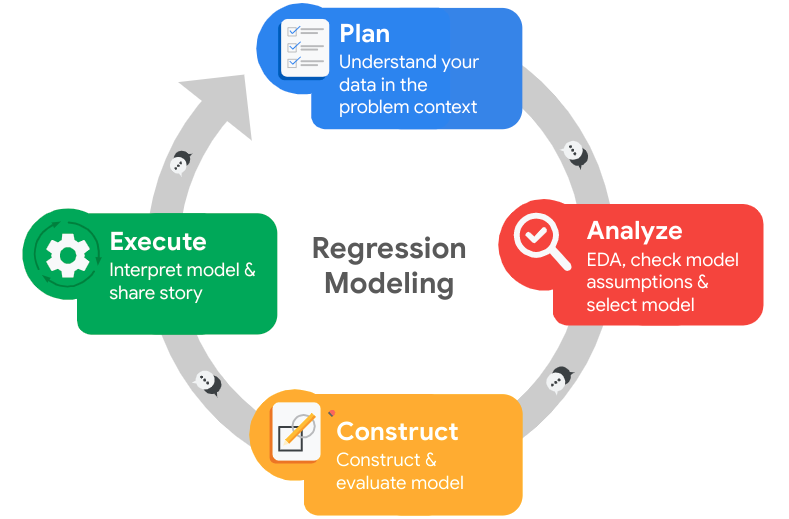

## **Pace: Plan**



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. We need to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goals in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset in this project contains 15,000 rows and 10 columns for the variables listed below. 

Data set is included in the git repo!!

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Questions to keep in focus as we complete the plan stage.

*  Who are our stakeholders for this project?
- What are we trying to solve or accomplish?
- What are our initial observations when you explore the data?
- What resources do we find ourselves using as we complete this stage? 
- Do we have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [91]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, \
confusion_matrix, roc_curve, ConfusionMatrixDisplay, classification_report

import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_dataset.csv`.**  

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df0.shape

(14999, 10)

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed

df0.rename(columns={'time_spend_company':'tenure', 'average_montly_hours':'average_monthly_hours', 'Department':'department',
                   'Work_accident':'work_accident'}, inplace=True)

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates

dup= df0[df0.duplicated(keep=False)]  # Retrieve all rows with duplicates
dup.shape

(5346, 10)

In [11]:
df0.duplicated().sum()  # same as removing the keep=False above

3008

In [12]:
# Inspect some rows containing duplicates as needed

dup.sort_values(['satisfaction_level' ,'last_evaluation', 'number_project', 'average_monthly_hours']).head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.copy()

df1.drop_duplicates(keep='first',inplace=True)

# Display first few rows of new dataframe as needed

df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

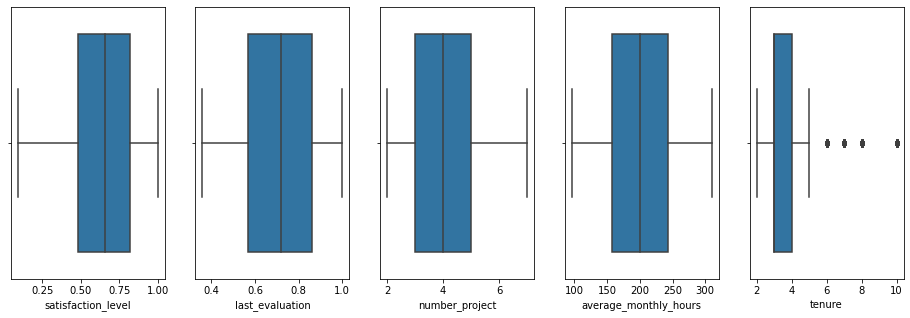

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

fig, ax = plt.subplots(1,5, figsize=(16,5))

sns.boxplot(x=df1['satisfaction_level'], ax= ax[0])

sns.boxplot(x=df1['last_evaluation'], ax=ax[1])

sns.boxplot(x=df1['number_project'], ax=ax[2])

sns.boxplot(x=df1['average_monthly_hours'], ax=ax[3])

sns.boxplot(x=df1['tenure'],ax=ax[4])

In [15]:
# Determine the number of rows containing outliers


df1[df1['tenure']>5].shape[0]

824

In [16]:
quantile25 = df1['tenure'].quantile(.25)
quantile75 = df1['tenure'].quantile(.75)

iqr = quantile75- quantile25

lower_limit = quantile25 - 1.5*iqr
upper_limit = quantile75 + 1.5 * iqr


print(f' the lower limit is = {lower_limit}')
print(f' the upper limit is = {upper_limit}')

df1[(df1['tenure']<lower_limit) | (df1['tenure']>upper_limit)].shape


 the lower limit is = 1.5
 the upper limit is = 5.5


(824, 10)

Because Certain types of models are more sensitive to outliers than others such as regression model, When you get to the stage of building your model, we consider whether to remove outliers, based on the type of model we decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Research questions as we complete the analyze stage.

- What did we observe about the relationships between variables?
- What do we observe about the distributions in the data?
- What transformations do we need to make with our data? and why ? 
- What are some purposes of EDA before constructing a predictive model?
- What resources do we find ourselves using as we complete this stage? 
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed

print(df1.value_counts('left'))
# Get percentages of people who left vs. stayed

df1.value_counts('left', normalize=True)

left
0    10000
1     1991
dtype: int64


left
0    0.833959
1    0.166041
dtype: float64

### Data visualizations

Now, examine variables that we're interested in, and create plots to visualize relationships between variables in the data.

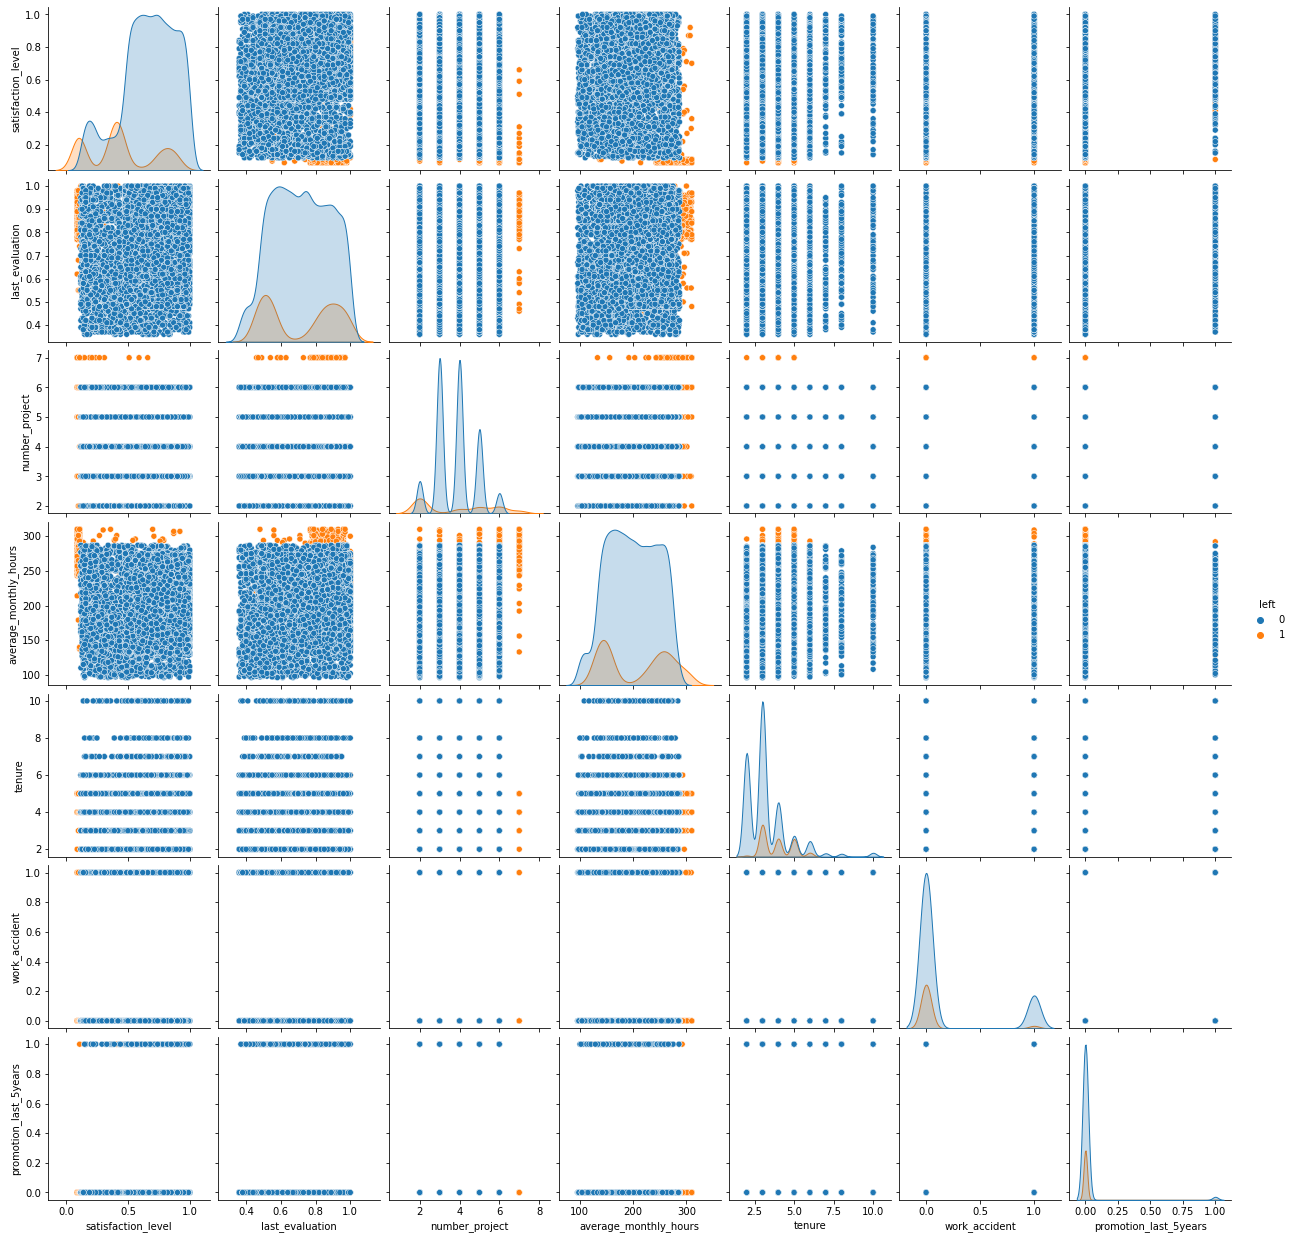

In [18]:
# Create a plot as needed

sns.pairplot(df1, hue='left')

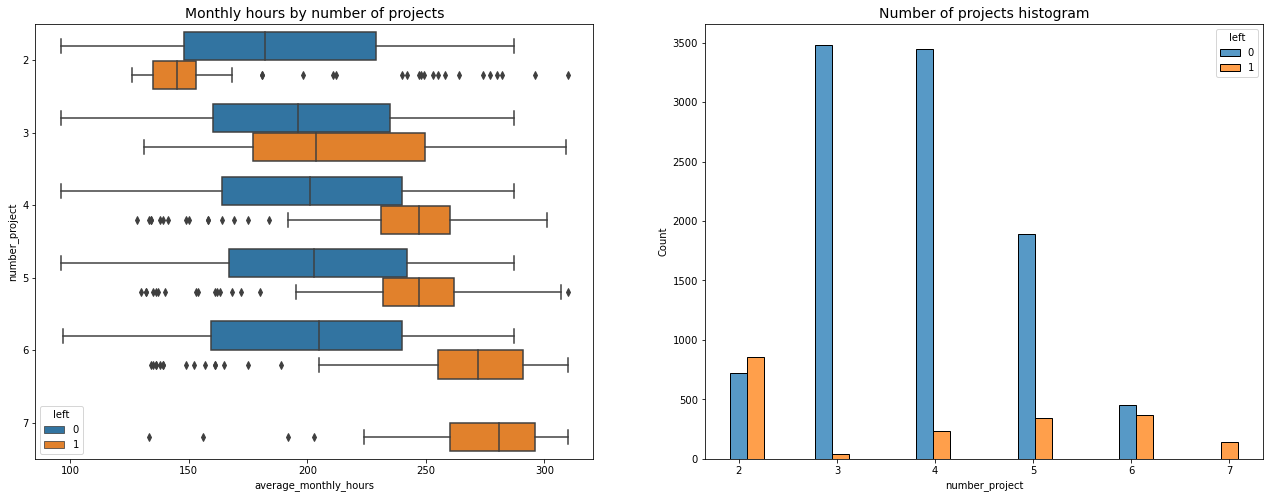

In [19]:
# Create a plot as needed      ['satisfaction_level', 'last_evaluation', 'number_project',
   #    'average_monthly_hours', 'tenure', 'work_accident', 'left',
    #   'promotion_last_5years', 'department', 'salary']

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.boxplot(data=df1, x='average_monthly_hours', y ='number_project' , hue='left', ax=ax[0], orient='h')
ax[0].set_title('Monthly hours by number of projects',fontsize=14)

sns.histplot(data=df1, x=df1['number_project'], hue='left', shrink=2, multiple='dodge', ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize=14)

plt.show()

In [20]:
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by Satisfaction level')

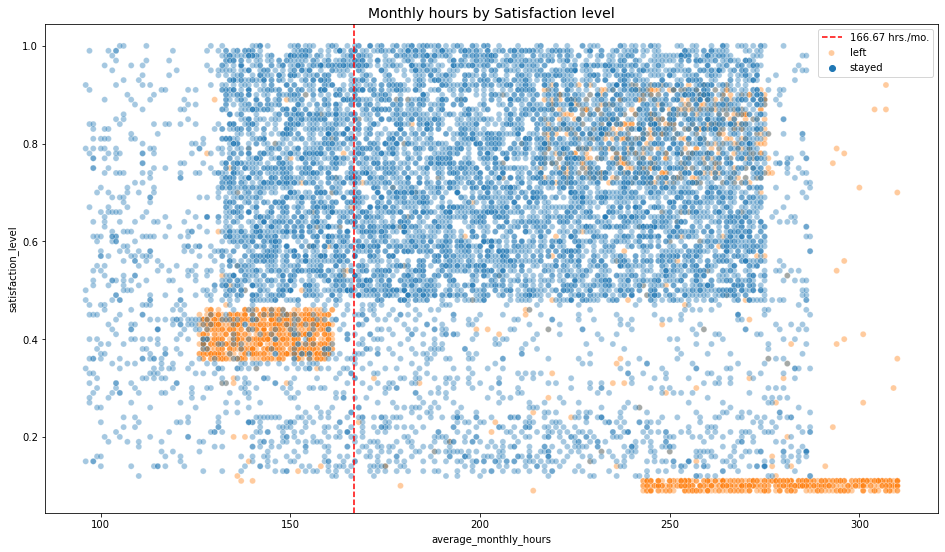

In [21]:
# Create a plot as needed
# 50 weeks * 40 hours per week / 12 months = 166.67 hours per month

plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', ls='--', label='166.67 hrs./mo')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by Satisfaction level', fontsize=14)

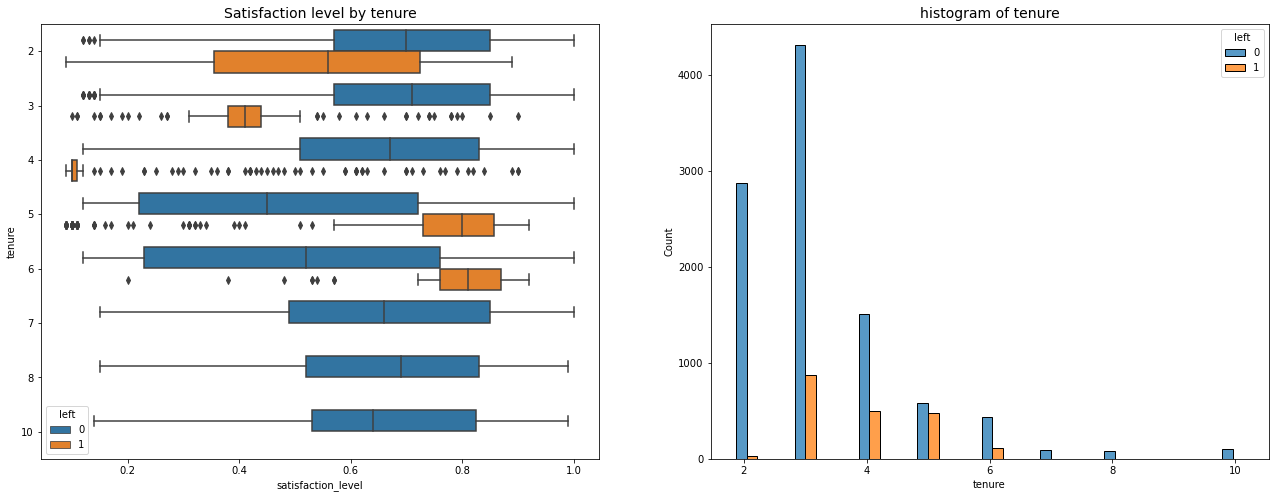

In [22]:
# Create a plot as needed

# Create a plot as needed      ['satisfaction_level', 'last_evaluation', 'number_project',
   #    'average_monthly_hours', 'tenure', 'work_accident', 'left',
    #   'promotion_last_5years', 'department', 'salary']

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.boxplot(data=df1, x='satisfaction_level', y ='tenure' , hue='left', ax=ax[0], orient='h')
ax[0].set_title('Satisfaction level by tenure',fontsize=14)

sns.histplot(data=df1, x=df1['tenure'], hue='left', shrink=4, multiple='dodge', ax=ax[1])
ax[1].set_title('histogram of tenure', fontsize=14)

plt.show()

In [23]:
# Create a plot as needed

df1.groupby('left')['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


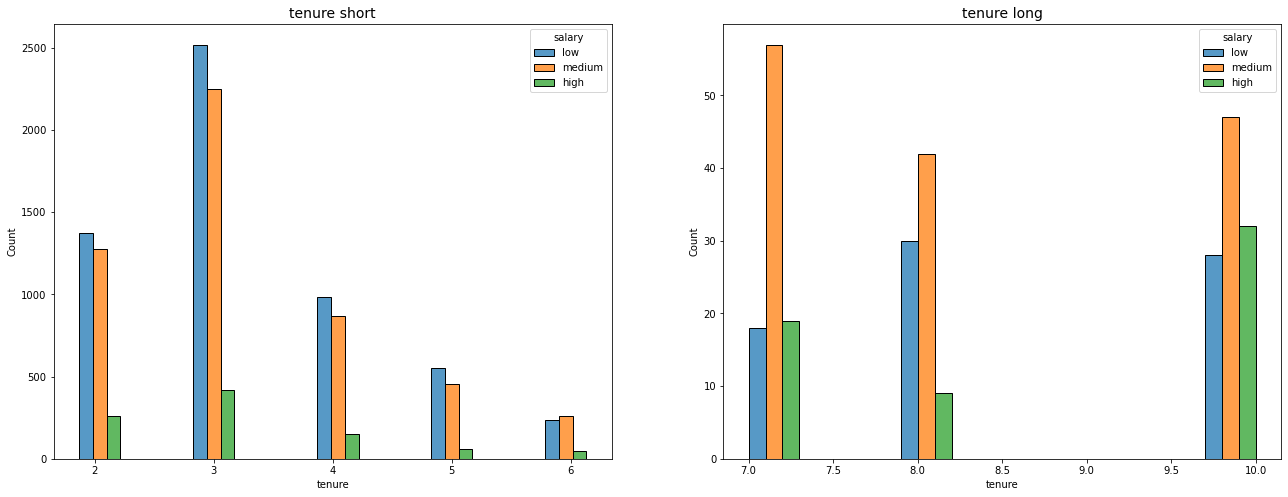

In [24]:
# Create a plot as needed

fig, ax = plt.subplots(1,2, figsize=(22,8))

tenure_low = df1[df1['tenure'] <=6]
tenure_high = df1[df1['tenure'] > 6]

sns.histplot(data=tenure_low,  x=tenure_low['tenure'], hue='salary', hue_order=['low','medium','high'], shrink=4, multiple='dodge',ax=ax[0])
ax[0].set_title('tenure short', fontsize=14)

sns.histplot(data=tenure_high,  x=tenure_high['tenure'], hue='salary', hue_order=['low','medium','high'], shrink=1, multiple='dodge',ax=ax[1])
ax[1].set_title('tenure long', fontsize=14)

plt.show()

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

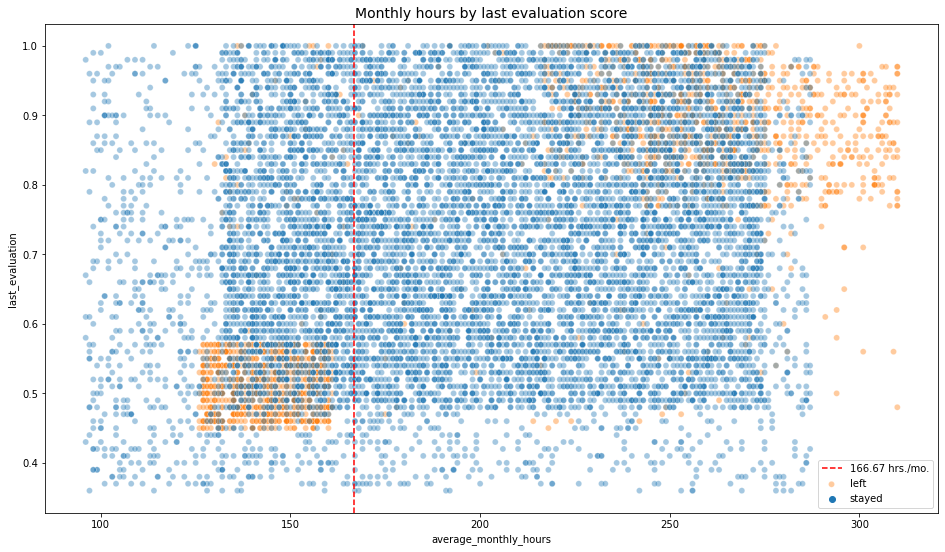

In [25]:
# Create a plot as needed

plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', ls='--', label='166.67 hrs./mo')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize=14)

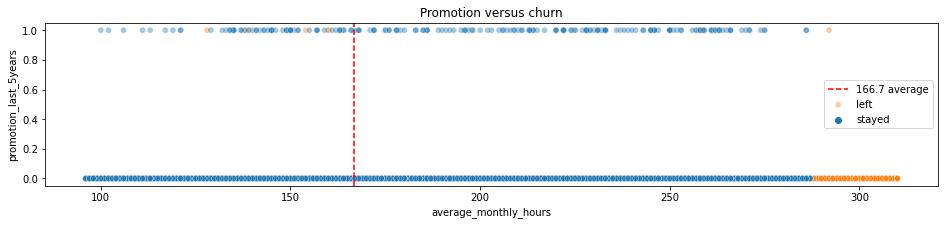

In [26]:
# Create a plot as needed

plt.figure(figsize=(16,3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.7, color='red', ls='--')
plt.legend(labels=['166.7 average', 'left', 'stayed'])
plt.title('Promotion versus churn', fontsize=12)
plt.show()

In [27]:

df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

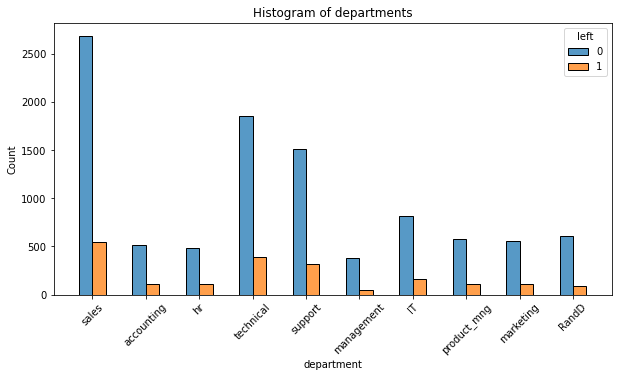

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Histogram of departments', fontsize=12)
plt.show()

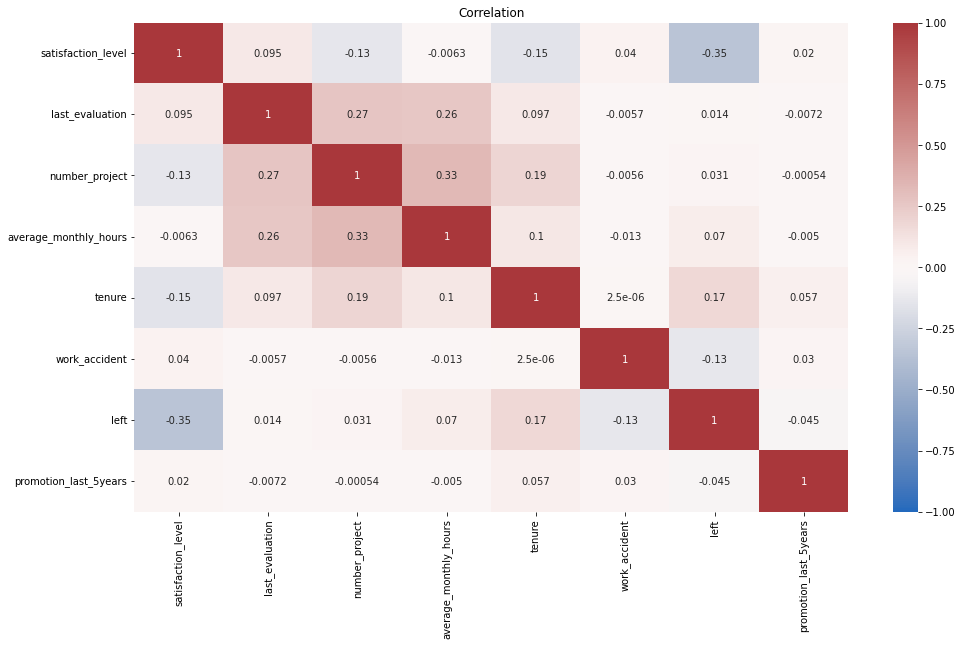

In [29]:
plt.figure(figsize=(16,9))
hmap =sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))
hmap.set_title('Correlation')
plt.show()

# Regression model


In [141]:
df_en = df1.copy()

# label encoding
df_en['salary']= (df_en['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)
df_en.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1


In [142]:
df_en = pd.get_dummies(df_en, drop_first=False)
df_en.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0


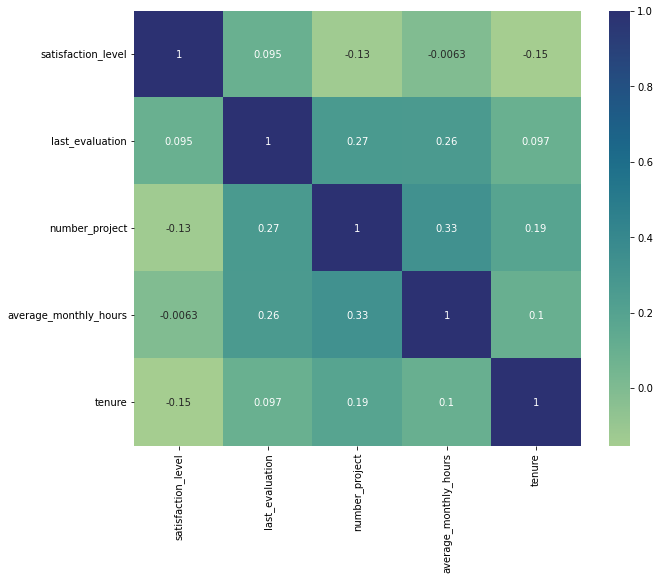

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df_en[['satisfaction_level','last_evaluation', 'number_project','average_monthly_hours','tenure']].corr(), annot=True, cmap='crest')
plt.show()

In [144]:
# remove the tenure outliers 
df_en = df_en[(df_en['tenure']>=lower_limit) & (df_en['tenure']<=upper_limit)]
df_en.shape

(11167, 19)

In [145]:
y = df_en['left']

X = df_en.drop('left', axis=1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=.25,stratify=y, random_state=42)

In [147]:
logit_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [148]:
y_pred = logit_clf.predict(X_test)

In [149]:
logit_cm = confusion_matrix(y_test,y_pred, labels=logit_clf.classes_)
logit_cm

array([[2165,  156],
       [ 348,  123]])

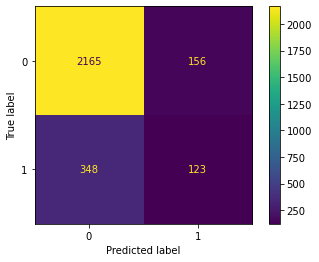

In [150]:
# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix= logit_cm, display_labels=logit_clf.classes_)
display.plot(values_format='')
plt.show()

In [151]:
target_names = ['would leave', 'would stay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 would leave       0.86      0.93      0.90      2321
  would stay       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



In [152]:

print('accuracy score:'), print(accuracy_score(y_test, y_pred))

print('precision score:'), print(precision_score(y_test, y_pred))

print('recall score:'), print(recall_score(y_test, y_pred))

print('f1 score:'), print(f1_score(y_test, y_pred))

accuracy score:
0.8194842406876791
precision score:
0.44086021505376344
recall score:
0.2611464968152866
f1 score:
0.328


(None, None)

# Naive Bayes 

In [153]:
# Instantiate the scaler
X_train2 = X_train.copy()
X_test2 =  X_test.copy()

scaler = MinMaxScaler()
scaler.fit(X_train2)

# fit transform training and test -Note only training was fit 1st
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [154]:
nb_clf = GaussianNB().fit(X_train2, y_train)

In [155]:
y_pred = nb_clf.predict(X_test2)

nb_cm = confusion_matrix(y_test,y_pred, labels= nb_clf.classes_)
nb_cm

array([[1951,  370],
       [  88,  383]])

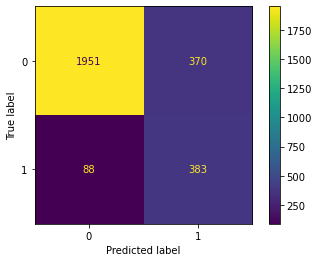

In [156]:
# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix= nb_cm, display_labels=nb_clf.classes_)
display.plot(values_format='')
plt.show()

In [157]:
target_names = ['would leave', 'would stay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 would leave       0.96      0.84      0.89      2321
  would stay       0.51      0.81      0.63       471

    accuracy                           0.84      2792
   macro avg       0.73      0.83      0.76      2792
weighted avg       0.88      0.84      0.85      2792



In [158]:
print('accuracy score:'), print(accuracy_score(y_test, y_pred))

print('precision score:'), print(precision_score(y_test, y_pred))

print('recall score:'), print(recall_score(y_test, y_pred))

print('f1 score:'), print(f1_score(y_test, y_pred))

accuracy score:
0.8359598853868195
precision score:
0.5086321381142098
recall score:
0.8131634819532909
f1 score:
0.6258169934640523


(None, None)

#  Decision Trees Regression

In [42]:
tree = DecisionTreeClassifier(random_state=0)

In [43]:
cv_params = {
    'max_depth':[4,6,8,None],
    'min_samples_leaf':[2,5,1],
    'min_samples_split':[2,4,6]
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [44]:
%%time
tree1.fit(X_train,y_train)

CPU times: user 2.69 s, sys: 0 ns, total: 2.69 s
Wall time: 2.69 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [45]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [46]:
#auc score
tree1.best_score_

0.9738070859906354

In [47]:
metric_list = ['mean_test_roc_auc', 'mean_test_precision', 'mean_test_recall','mean_test_f1','mean_test_accuracy']
metric_columns = ['auc', 'precision','recall', 'f1', 'accuracy']

In [48]:
df_results = pd.DataFrame(tree1.cv_results_)


In [49]:
df_results = df_results[metric_list].max().to_frame().transpose()

In [50]:
df_results.columns = metric_columns
df_results['model']= 'decision tree'
df_results

,auc,precision,recall,f1,accuracy,model
0,0.973807,0.972884,0.91638,0.943319,0.981493,decision tree


In [51]:
def make_results(model_name, model):
    metric_list = ['mean_test_roc_auc', 'mean_test_precision', 'mean_test_recall','mean_test_f1','mean_test_accuracy']
    metric_columns = ['auc', 'precision','recall', 'f1', 'accuracy']
    df = pd.DataFrame(model.cv_results_)
    df = df[metric_list].max().to_frame().transpose()
    df.columns = metric_columns
    df['model']= model_name
    return df
    

# Random Forect - prevents overfitting

In [52]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [53]:
%%time
rf1.fit(X_train,y_train)

CPU times: user 8min 30s, sys: 0 ns, total: 8min 30s
Wall time: 8min 31s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [54]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [56]:
rf1.best_score_

0.9801962654493814

In [55]:
path = '/model/'

In [57]:
def write_pickle(path, model_object, save_as:str):
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [58]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [61]:
# write_pickle(path, rf1, 'Rfmodel')

In [64]:
df_results2 = make_results('random forest', rf1)
df_results2

,auc,precision,recall,f1,accuracy,model
0,0.980196,0.990775,0.914258,0.950892,0.98412,random forest


In [65]:
pd.concat([df_results,df_results2])

,auc,precision,recall,f1,accuracy,model
0,0.973807,0.972884,0.916380,0.943319,0.981493,decision tree
0,0.980196,0.990775,0.914258,0.950892,0.984120,random forest


In [66]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)  #:NOTE 

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [67]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest- test data scores', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest- test data scores,0.982063,0.929936,0.955289,0.985315,0.963245


In [68]:
tree1_test_scores = get_scores('decision trees - test data scores', tree1, X_test, y_test)
tree1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,decision trees - test data scores,0.962637,0.929936,0.946004,0.982092,0.961306


### Insights

# paCe: Construct Stage
- Determine which models are most appropriate (obviousily the Trees- has performed better)
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## We recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### we Reflect on these questions as we complete the constructing stage.

- Have we noticed anything odd?
- Which independent variables do you choose for the final model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can we improve it? Is there anything you would dim fit to change about the model?
- What resources do you find ourselves using as we complete this stage? 
- Do you have any ethical considerations in this stage?



## NEXT:  Model Building,  Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

###  Festure engineerig 



In [161]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_en.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head(2)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [162]:
### ALL in one ###
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [163]:
# 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.
# You could define being overworked as working more than 175 hours per month on average.

df2['overworked'] =(df2['overworked']> 175).astype(int)
df2['overworked'].head()

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [164]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

In [165]:
# Isolate the outcome variable (new data set with engineered feature)
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [166]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Decision tree -2

In [132]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [133]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.13 s, sys: 0 ns, total: 2.13 s
Wall time: 2.13 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [134]:
tree2.best_params_



{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [135]:
tree2.best_score_


0.9619492433207136

In [136]:
make_results('decision tree 2 cv', tree2)

,auc,precision,recall,f1,accuracy,model
0,0.961949,0.919866,0.905047,0.903134,0.967761,decision tree 2 cv


# Random forest 2

In [137]:

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [138]:
%%time
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [139]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [140]:
rf2.best_score_

0.969629880934146

In [159]:
make_results('random forest 2 cv', rf2)

,auc,precision,recall,f1,accuracy,model
0,0.96963,0.917445,0.900798,0.901519,0.967403,random forest 2 cv


In [167]:
rf2_test_scores = get_scores('random forest 2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest 2 test,0.89441,0.917197,0.90566,0.967765,0.947612


In [168]:
tree2_test_scores = get_scores('decision tree 2 test', tree2, X_test, y_test)
tree2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,decision tree 2 test,0.850394,0.917197,0.882533,0.958811,0.942226


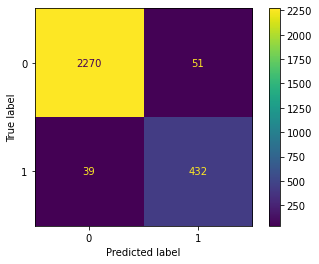

In [169]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

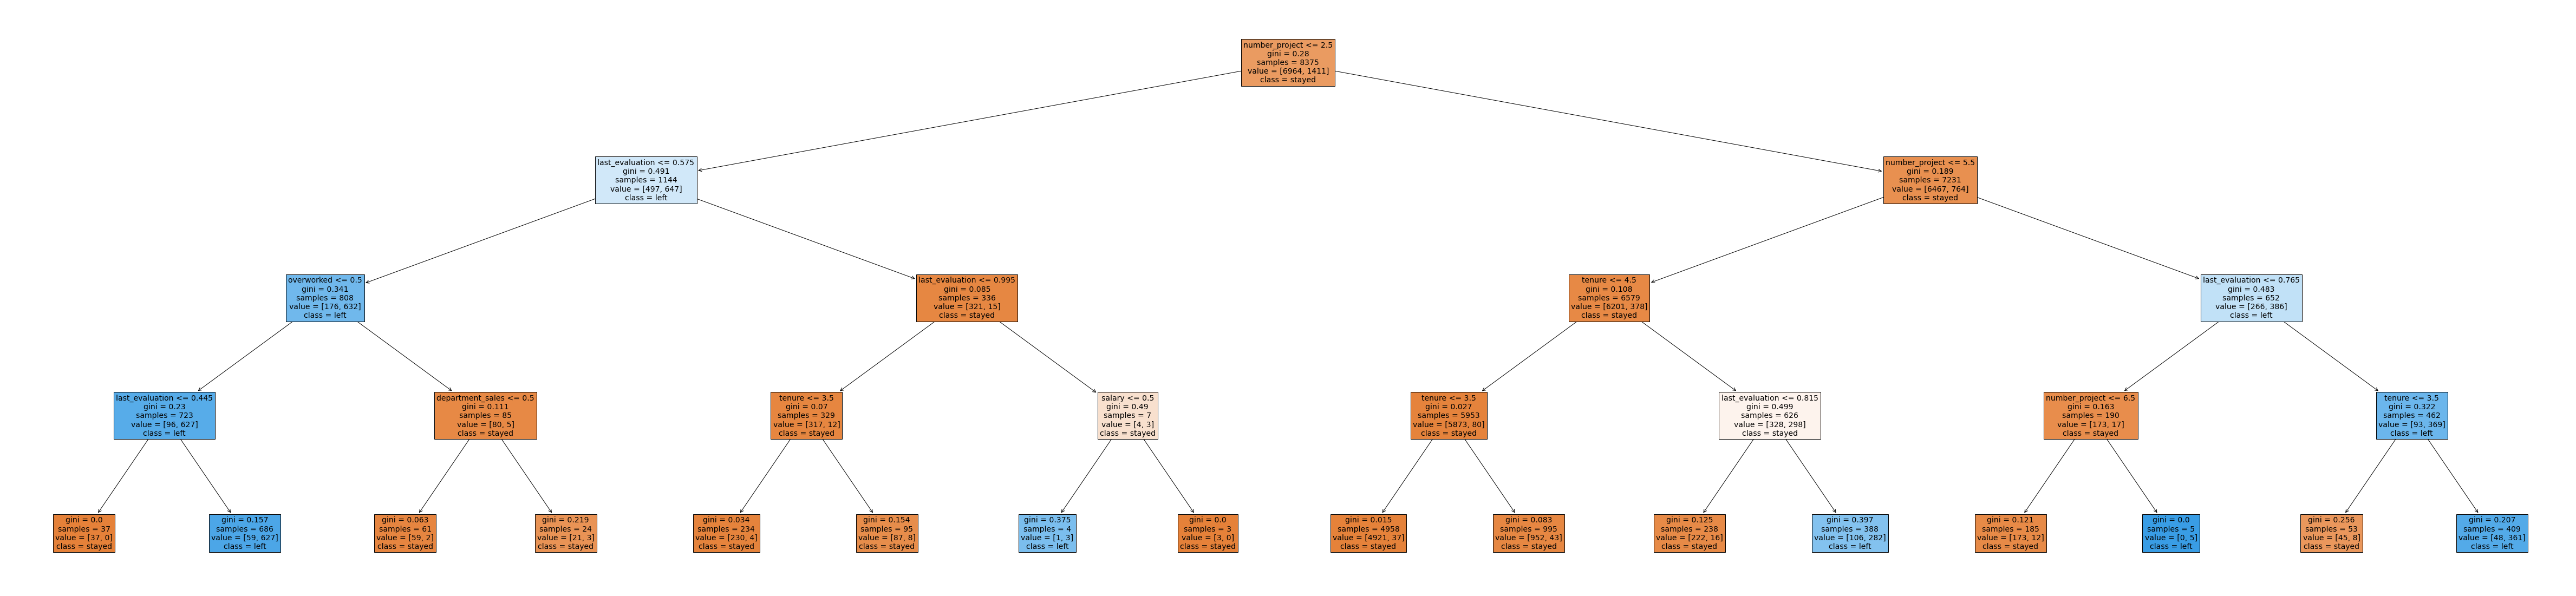

In [170]:
# plot tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, class_names={0:'stayed',1:'left'}, filled=True)
plt.show()

# Desision tree importance

In [171]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.438579
last_evaluation,0.333916
tenure,0.169270
overworked,0.056963
salary,0.001105
department_sales,0.000168


In [172]:
tree2.best_estimator_.feature_importances_

array([3.33915727e-01, 4.38578799e-01, 1.69269532e-01, 0.00000000e+00,
       0.00000000e+00, 1.10510600e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.67843969e-04, 0.00000000e+00, 0.00000000e+00,
       5.69629924e-02])

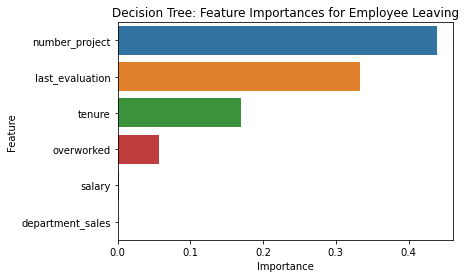

In [173]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# random forest feature importance

In [174]:
rf2.best_estimator_.feature_importances_

array([3.18720355e-01, 3.93140286e-01, 2.05389468e-01, 4.70142335e-04,
       4.10745377e-05, 9.22339274e-04, 3.91438190e-04, 1.23535676e-04,
       5.07057937e-04, 6.28042465e-05, 6.52847973e-05, 1.45362849e-04,
       8.86032820e-05, 6.14914439e-04, 2.67064006e-04, 2.93835906e-04,
       7.87564336e-02])

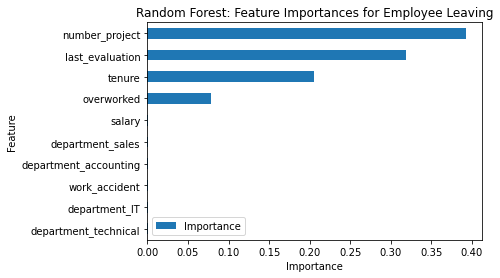

In [176]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage/ Ready for 1st phase Deployment
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Key considerations for the executing stage.

- What key insights emerged from our final model(s)?
- What business recommendations do we propose based on the models built?
- What potential recommendations would we make to your manager/company?
- Can our model be improved? Why or why not? How?
- What do we know about the data and the models we are using, what other questions could we address as a team?
- What resources do we find yourself using as you complete this stage? 
- Do you have any ethical considerations in this stage?



## Finalizing  Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders
- Tableau or PowerBI where necessary


